In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('winequality-red.csv')
df[df.columns.difference(['density', 'chlorides'])] = df[df.columns.difference(['density', 'chlorides'])].round(2)
df['density'] = df['density'].round(5)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [247]:
# standard deviation data modification

df['zscore']=((df['citric acid']-df['citric acid'].mean())/df['citric acid'].std())
filt=np.abs(df['zscore'])<3
data=df[filt]

df['zscore2']=((df['alcohol']-df['alcohol'].mean())/df['alcohol'].std())
filt=np.abs(df['zscore2'])<3
df=df[filt]
df['zscore3']=((df['total sulfur dioxide']-df['total sulfur dioxide'].mean())/df['total sulfur dioxide'].std())
filt=np.abs(df['zscore3'])<3
df=df[filt]

X=df.drop(['quality','zscore','zscore2','free sulfur dioxide','zscore3'],axis=1)
y=df['quality']
X.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [248]:
def convert_quality(quality):
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1  
    else:
        return 2

In [249]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#X = df[df.columns.difference(['quality'])]

y = y.apply(convert_quality)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3)
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)


In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_shape=(10,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/150
35/35 [==============================] - 0s 457us/step - loss: 0.6376 - accuracy: 0.8132
Epoch 2/150
35/35 [==============================] - 0s 457us/step - loss: 0.6374 - accuracy: 0.8132
Epoch 3/150
35/35 [==============================] - 0s 486us/step - loss: 0.6372 - accuracy: 0.8132
Epoch 4/150
35/35 [==============================] - 0s 514us/step - loss: 0.6370 - accuracy: 0.8132
Epoch 5/150
35/35 [==============================] - 0s 514us/step - loss: 0.6369 - accuracy: 0.8132
Epoch 6/150
35/35 [==============================] - 0s 543us/step - loss: 0.6367 - accuracy: 0.8132
Epoch 7/150
35/35 [==============================] - 0s 543us/step - loss: 0.6365 - accuracy: 0.8132
Epoch 8/150
35/35 [==============================] - 0s 543us/step - loss: 0.6363 - accuracy: 0.8132
Epoch 9/150
35/35 [==============================] - 0s 572us/step - loss: 0.6361 - accuracy: 0.8132
Epoch 10/150
35/35 [==============================] - 0s 543us/step - loss: 0.6359 - accura

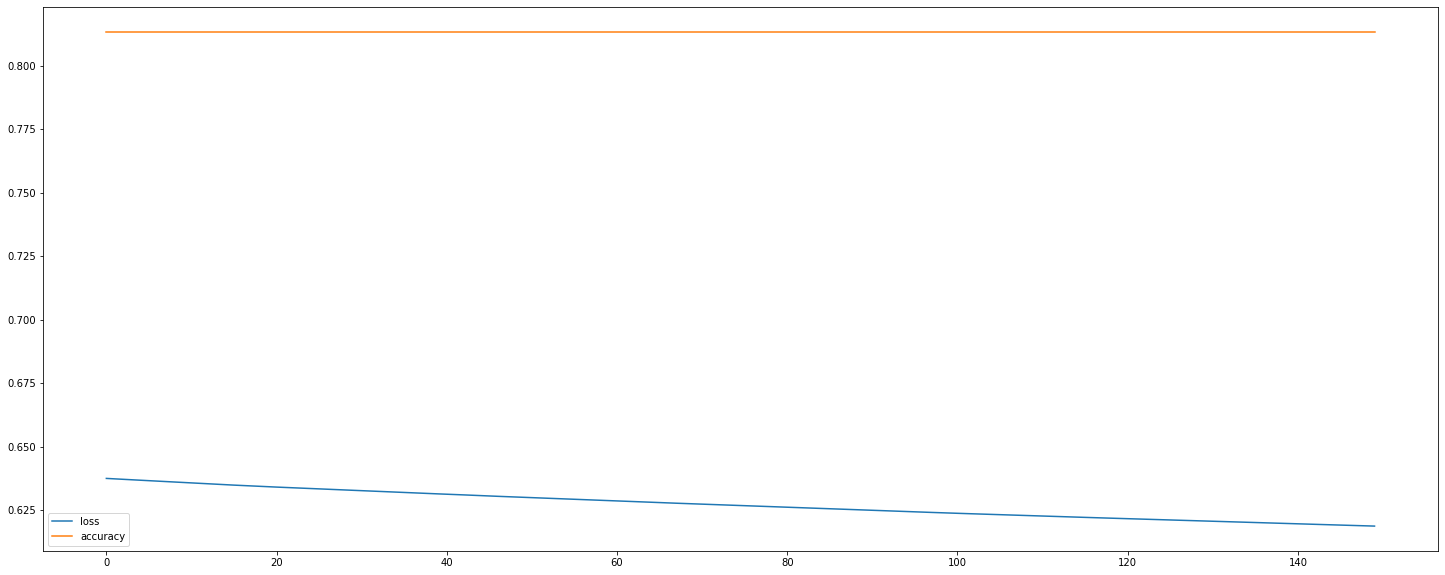

In [256]:
from livelossplot import PlotLossesKeras
import time

# train with timing
start_time = time.time()
history = model.fit(X_train, y_train, epochs=150)
print("Process finished --- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(history.history).plot(figsize=(25,10))
plt.show()
y_pred = model.predict(X_test)

<AxesSubplot:>

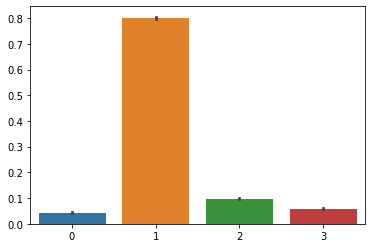

In [252]:
sns.barplot(data=y_pred)

In [253]:
results = model.evaluate(X_train, y_train)
results

35/35 [==============================] - 0s 371us/step - loss: 0.6376 - accuracy: 0.8132


[0.6376256346702576, 0.813236653804779]

In [254]:
results = model.evaluate(X_test, y_test)
results

15/15 [==============================] - 0s 467us/step - loss: 0.5443 - accuracy: 0.8541


[0.5443214774131775, 0.8541226387023926]

In [255]:
model.save('NN_Model')
print(model.get_weights())

INFO:tensorflow:Assets written to: NN_Model\assets
[array([[ 0.24334568, -0.15136549, -0.08352733, -0.1967455 ,  0.55892044,
         0.11712217, -0.35012418,  0.5799908 ],
       [-0.1148307 ,  0.40048766, -0.5071222 , -0.56218946,  0.43834114,
         0.31321186, -0.06438941,  0.529398  ],
       [-0.17440593, -0.30081373, -0.27405038, -0.42338353, -0.07832235,
         0.26493335,  0.02044475, -0.06559803],
       [-0.25729883, -0.14486146, -0.28325772, -0.1380551 ,  0.45241103,
        -0.4024576 , -0.20734787, -0.3548171 ],
       [-0.04468608,  0.35203385, -0.22308868, -0.3800605 , -0.07459809,
        -0.07488161, -0.3748232 , -0.09529359],
       [-0.5630344 , -0.31140062, -0.32210657, -0.09839   , -0.16085859,
        -0.376891  , -0.00200969, -0.19113736],
       [ 0.05455786,  0.25938642, -0.2333518 , -0.3766508 ,  0.06020723,
        -0.32291856,  0.07090747, -0.33325332],
       [ 0.500733  ,  0.13563156,  0.00936812, -0.16865055, -0.12642464,
         0.11222565,  0.4858